In [23]:
import os
from pathlib import Path
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

path = Path.cwd() / 'img' / 'tmp'
img = os.path.isfile(str(path / 'tmp_61539a96-6e14-4354-88ce-136b4acc7c73.jpg'))
img_path = str(path / 'tmp_088a7623-da83-4d44-ad99-e2e9736d61af.jpg')

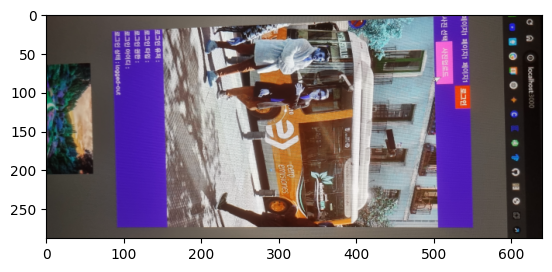

In [7]:
rimg = cv2.rotate(image,0)
resize = imutils.resize(rimg, width=640)
plt.imshow(resize)

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import torch
print(torch.version.cuda)  # PyTorch가 인식한 CUDA 버전 출력
print(torch.cuda.is_available())  # CUDA 가속 가능 여부
print(torch.cuda.device_count())  # GPU 개수 출력
print(torch.cuda.get_device_name(0)) 

12.8
True
1
NVIDIA GeForce GTX 1060 3GB


In [ ]:
import torch
print(torch.version.cuda)  # PyTorch가 인식한 CUDA 버전 출력
print(torch.cuda.is_available())  # CUDA 가속 가능 여부
print(torch.cuda.device_count())  # GPU 개수 출력
print(torch.cuda.get_device_name(0)) 

12.8
True
1
NVIDIA GeForce GTX 1060 3GB


In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("./model/yolo11/Seg/yolo11n-seg.pt")

results = model.predict(
    source="https://ultralytics.com/images/bus.jpg",
    conf=0.5,
    imgsz=(640, 480),
    device='cuda:0',
    max_det=10,
    retina_masks=Trueb
)
results


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\3\MyCode\mini_project\bus.jpg: 640x480 3 persons, 1 bus, 47.4ms
Speed: 4.0ms preprocess, 47.4ms inference, 40.0ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [15]:
len(results[0].masks.data)

4

In [36]:
labels = results[0].names  # 모델이 인식한 객체 클래스 이름
box_label = results[0].boxes.cls.cpu().numpy()  # 감지된 객체의 클래스 인덱스
print(f"객체 레이블: {labels[int(box_label[0])]}")  # 해당 마스크의 레이블 출력

객체 레이블: bus


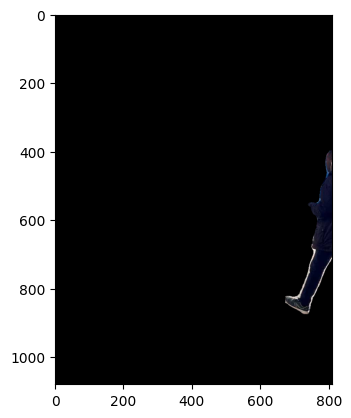

In [31]:
img_path = "https://ultralytics.com/images/bus.jpg"
response = requests.get(img_path)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
mask = results[0].masks.data[1].cpu().numpy()

mask = (mask * 255).astype(np.uint8)
masked_image = cv2.bitwise_and(image, image, mask=mask)
img = cv2.cvtColor(masked_image,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

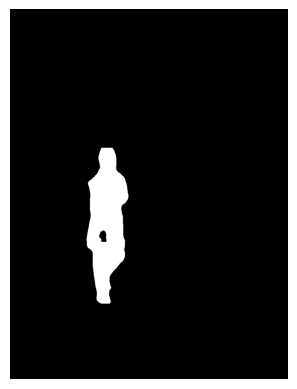

In [16]:
# Visualize the first mask from the results
if results[0].masks is not None:
	mask = results[0].masks.data[3].cpu().numpy()
	plt.imshow(mask, cmap='gray')
	plt.axis('off')
	plt.show()
else:
	print("No masks found in results.")